In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_theme(style="ticks", palette="pastel")

In [279]:
# Reset columns names
# Should I keep ID_REF?
# Are all those manipulations necessary? I have to do it again to plot the data... (for example in 3.e)
raw_data = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='utf-8', skiprows=58, encoding_errors='ignore', index_col=0, low_memory=False)
class_row = raw_data.iloc[:1,:]
float_data = raw_data.drop(["ID_REF", "Class"]).astype("float64")
data = pd.concat([class_row, float_data])
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.22579,7.525865,7.764637,7.198461,7.83145,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.2715,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.48359,6.387779,6.307066,...,6.789501,7.44194,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.28542,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,3.139504,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,2.787684,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,2.79354,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,3.580411,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


In [281]:
count_M = (data.loc["Class"] == "M").sum()
count_H = (data.loc["Class"] == "H").sum()
count_M, count_H

(49, 50)

In [282]:
data_without_incomplete_genes = data.dropna()
data_without_incomplete_genes

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.22579,7.525865,7.764637,7.198461,7.83145,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.2715,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.48359,6.387779,6.307066,...,6.789501,7.44194,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.28542,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139334,3.039961,3.220109,3.263782,3.138524,3.043079,3.231108,3.304716,3.384011,3.139504,...,3.525011,3.30903,3.6634,3.324005,4.619261,5.55878,3.416999,3.699181,3.48528,4.211922
AFFX-ThrX-M_at,2.747015,2.638606,2.495261,2.544199,2.50663,2.817982,2.52506,2.917278,2.643849,2.787684,...,2.930794,2.745955,3.165168,2.899104,4.066776,5.429437,2.834741,3.249683,2.711413,3.346835
AFFX-TrpnX-3_at,2.651554,2.643615,2.626028,2.504958,2.609707,2.52161,2.840601,2.509774,2.69682,2.79354,...,2.788852,2.725247,3.143401,2.768755,3.546117,4.48794,2.782356,3.056727,2.833818,3.069542
AFFX-TrpnX-5_at,3.413429,3.399063,3.53997,3.396225,3.43472,3.51609,3.514949,3.475952,3.495199,3.580411,...,3.701271,3.456717,4.127459,3.668327,4.889324,4.254286,3.88208,3.649827,3.52341,4.108475


In [ ]:
# Is that true? number of genes (a+d)

3. Analysis:<br>
a. There are 54675 profiled genes in described in the dataset.<br>
b. There are 99 samples (subjects/patients) in total.<br>
c. There are 49 samples in class "M" and 50 samples in class "H".<br>
d. After removing the rows with the missing values - there were left 54630 rows in the dataframe which represent 54628 genes.<br> 

In [260]:
transposed_data_frame_without_incomplete_genes = data_without_incomplete_genes.T
transposed_data_frame_without_incomplete_genes.reset_index(inplace=True, drop=True)
transposed_data_frame_without_incomplete_genes = transposed_data_frame_without_incomplete_genes.drop(columns=["ID_REF"])
transposed_data_frame_without_incomplete_genes

,Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
1,H,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
2,H,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
3,H,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
4,H,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,M,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
95,M,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
96,M,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
97,M,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,9.617118255,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


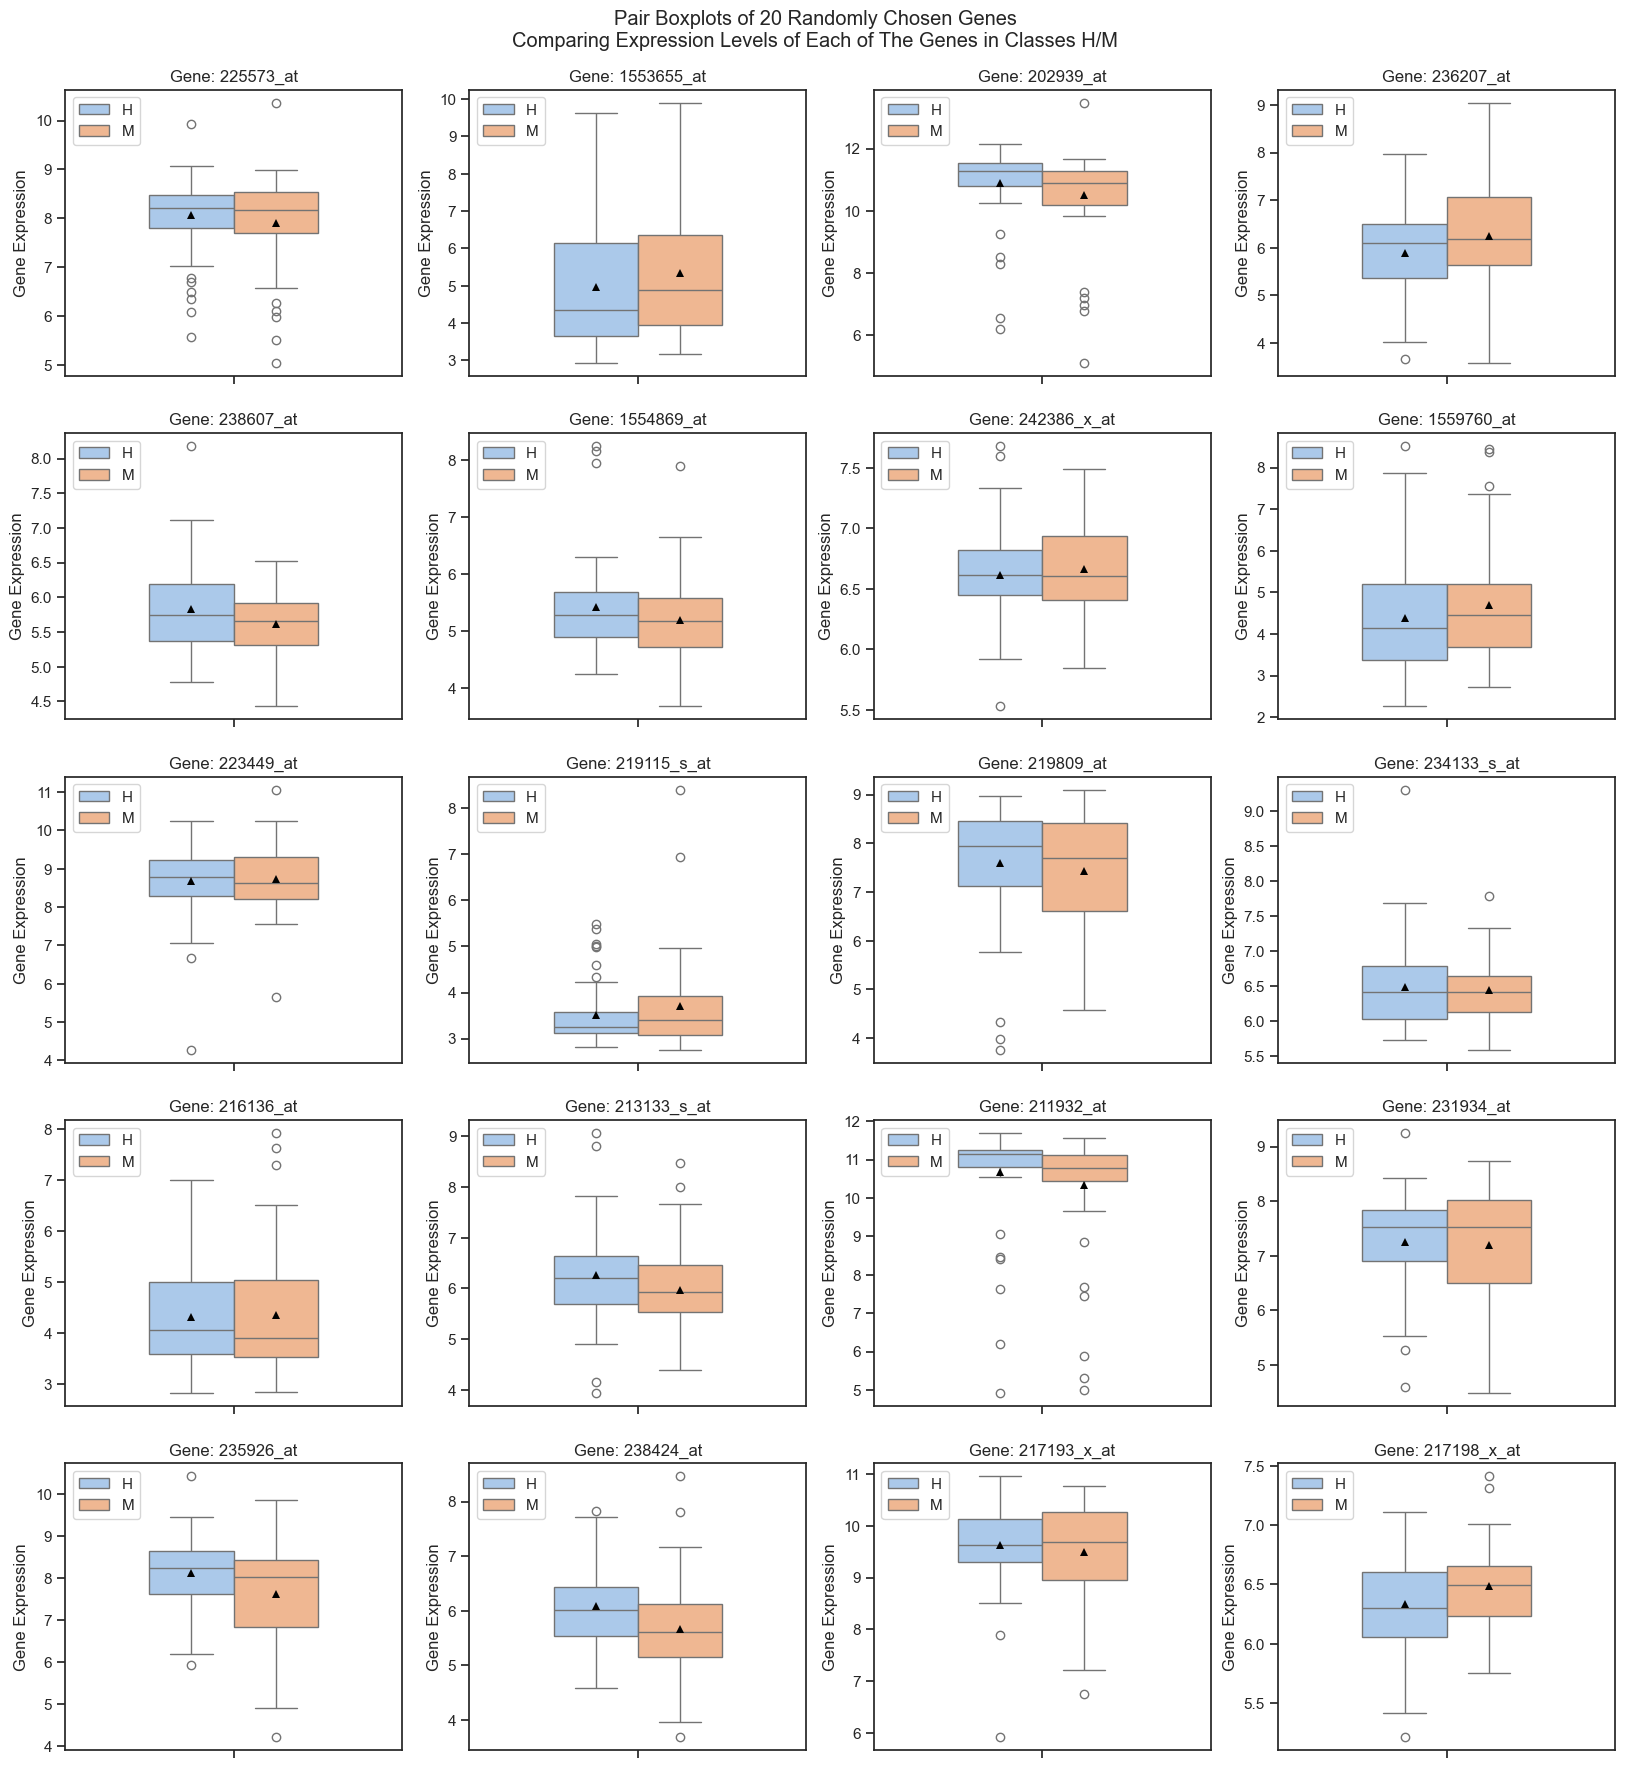

In [309]:
# Should I print values of quartiles, mean etc.?
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

all_gene_names = transposed_data_frame_without_incomplete_genes.columns
selected_genes = np.random.choice(all_gene_names, 20, replace=False)
selected_genes_with_label = np.insert(selected_genes, 0, "Class")
subset_data_without_incomplete_genes = transposed_data_frame_without_incomplete_genes[selected_genes_with_label]

for i, gene in enumerate(selected_genes):
    gene_data = subset_data_without_incomplete_genes[[gene]].astype('float64')
    gene_data_with_class = pd.concat([subset_data_without_incomplete_genes["Class"], gene_data], axis=1)
    H_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "H"].astype(float)
    M_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "M"].astype(float)
    
    sns.boxplot(y=gene,
                hue="Class",
                data=gene_data_with_class, 
                ax=axes[i], showfliers=True, showmeans=True, meanprops={"markerfacecolor":"black", "markeredgewidth":0}, width=0.5)   
     
    axes[i].set_title(f'Gene: {gene}')
    axes[i].set_ylabel('Gene Expression')
    axes[i].legend(loc='upper left')

plt.suptitle("Pair Boxplots of 20 Randomly Chosen Genes\nComparing Expression Levels of Each of The Genes in Classes H/M")
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()